# Overview

# Business Understanding

**We have been tasked with answering the following questions relating to King County Housing Sales:**
* Is there any correlation between house sale prices and renovation history?
* Is there any correlation between house sale prices and location within King County?
* Is there any correlation between house sale prices and square feet? sale prices and number of rooms (bedrooms and/or bathrooms)?


# Data Understanding

The data used for this project was sourced from a dataset called 'King County House Sales' and contains information regarding housing sales statistics in King County, WA.

The dataset contains the following columns:
* ```id```: A unique sale id relating to a house sale
* ```date```: Date of house sale
* ```price```: The price which the house sold for
* ```bedrooms```: How many bedrooms the house has
* ```bathrooms```: How many bathrooms the house has
* ```sqft_living```: How much square footage the house has
* ```sqft_lot```: How much square footage the lot has
* ```floors```: How many floors the house has
* ```waterfront```: Whether the house is on the waterfront. Originally contained 'YES' or 'NO', converted to 0 or 1 for comparative purposes
* ```view```: Whether the house has a view and whether it's fair, average, good, or excellent. Converted to numberical (0-4) for comparative purposes
* ```sqft_above```: How much of the houses square footage is above ground
* ```sqft_basement```: How much of the square footage is in the basement



# Data Preperation

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [88]:
df = pd.read_csv('data/kc_house_data.csv')

In [89]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [90]:
cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']
df = df[cols]
        

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,1180,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,2170,400.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,770,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,1050,910.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,1680,0.0


In [55]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.0+ MB


In [57]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [91]:
df['waterfront'] = df['waterfront'].fillna('NO')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.0+ MB


In [60]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [61]:
df['view'].isna().sum()

63

In [92]:
df['view'] = df['view'].fillna('NONE')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.0+ MB


In [64]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2050.0        1
2490.0        1
1481.0        1
1913.0        1
2810.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [93]:
df['sqft_basement'] = np.where(df['sqft_basement'] == '?', df['sqft_living'] - df['sqft_above'], df['sqft_basement'])


In [70]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
1960        1
1930        1
704         1
1920        1
3500        1
Name: sqft_basement, Length: 306, dtype: int64

In [94]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.0+ MB


In [29]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [95]:
df['waterfront'] = df['waterfront'].map({'NO':0, 'YES':1})

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 2.0+ MB


In [75]:
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [101]:
df['view'] = df['view'].map({'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4})

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 2.0+ MB


In [78]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,1788.596842,291.725008
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,827.759761,442.667800
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000


In [102]:
corr = df.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.010799,-0.005193
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.605368,0.323799
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.479386,0.302808
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.686668,0.283440
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.876448,0.435130
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,0.184139,0.015418
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,0.523989,-0.245715
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.071778,0.082800
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.166017,0.273845
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,1.000000,-0.052156


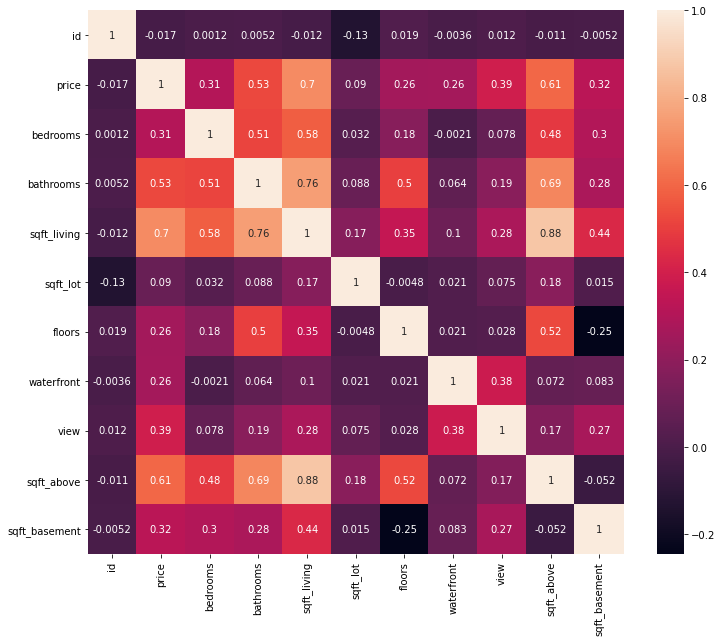

In [103]:
fig, ax = plt.subplots(figsize=(12,10)) 

sns.heatmap(corr, annot=True, ax=ax);

**Potential multicollinearity issues with sqft_above and sqft_living as well as sqft_living and bathrooms**

Most likely worth just using sqft_living and removing sqft_above and potentially sqft_basement (same issues)

Should also most likely remove the bathrooms column due to multicollinearity with sqft_living

### Filtering out columns that might have multicollinearity

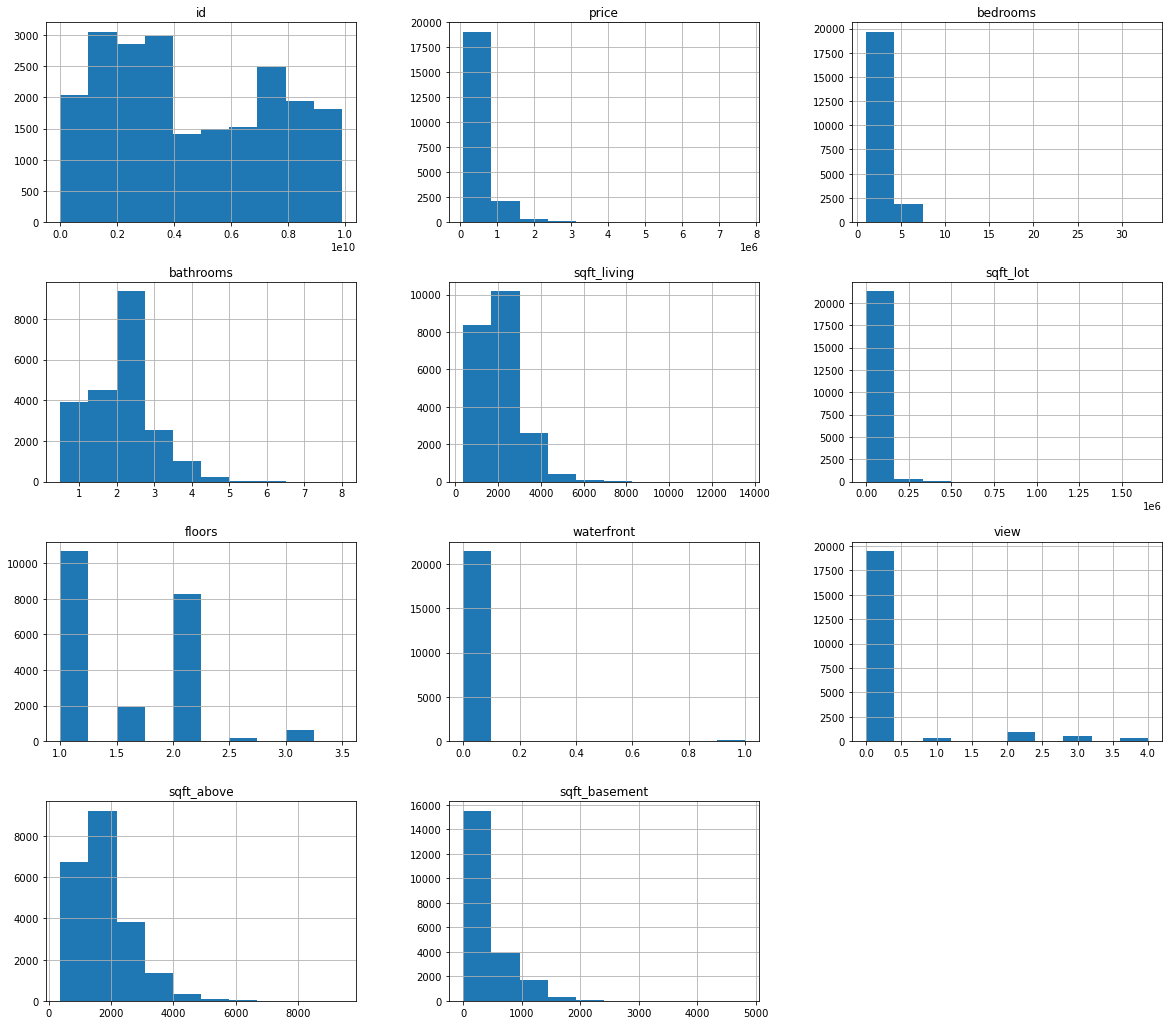

In [80]:
df.hist(figsize = (20,18));

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


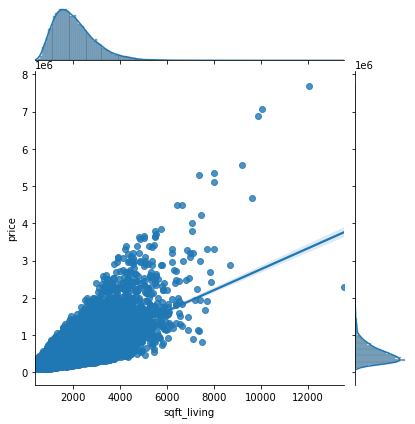

In [81]:
sns.jointplot('sqft_living', 'price', data=df, kind='reg');

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


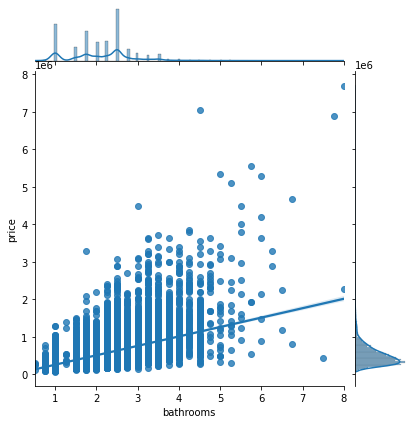

In [82]:
sns.jointplot('bathrooms', 'price', data=df, kind='reg');

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


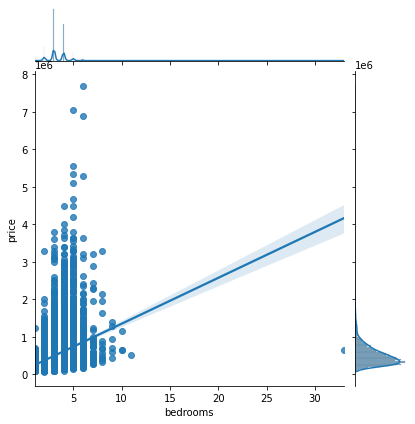

In [211]:
sns.jointplot('bedrooms', 'price', data=df, kind='reg');

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


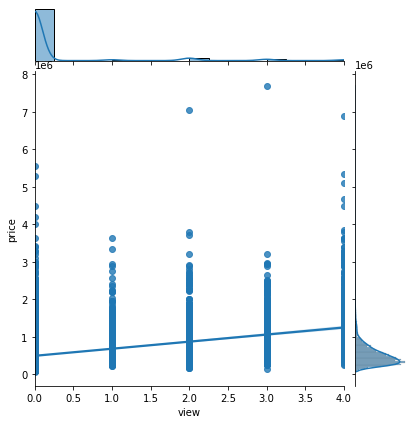

In [84]:
sns.jointplot('view', 'price', data=df, kind='reg');

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


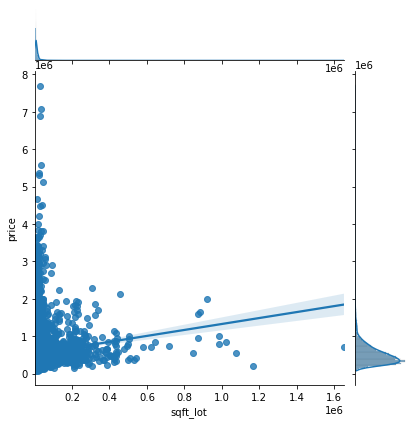

In [127]:
sns.jointplot('sqft_lot', 'price', data=df, kind='reg');

In [110]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,1180,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,2170,400.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,770,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,1050,910.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,1680,0.0


In [112]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']
outcome = 'price'


In [117]:
predictors = '+'.join(cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     3448.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:33:26   Log-Likelihood:            -2.9850e+05
No. Observations:               21597   AIC:                         5.970e+05
Df Residuals:                   21588   BIC:                         5.971e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.902e+04   7360.801      9.376      0.000    5.46e+04    8.34e+04
bedrooms      -4.733e+04   2251.600    -21.022      0.000   -5.17e+04   -4.29e+04
bathrooms      6342.2360   3643.991      1.740      0.082    -800.255    1.35e+04
sqft_living     188.3935      2.243     83.996      0.000     183.997     192.790
sqft_lot         -0.3931      0.041     -9.550      0.000      -0.474      -0.312
floors         9427.7470   4092.373      2.304      0.021    1406.393    1.74e+04
waterfront     5.882e+05   2.19e+04     26.875      0.000    5.45e+05    6.31e+05
view           7.419e+04   2478.982     29.927      0.000    6.93e+04     7.9e+04
sqft_above       94.3424      2.216     42.578      0.000      89.999      98.685
sqft_basement    94.0511      3.072     30.617      0.000      88.030     100.072
==============================================================================
Omnibus:                    13220.073   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           444714.685
Skew:                           2.403   Prob(JB):                         0.00
Kurtosis:                      24.705   Cond. No.                     1.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [177]:
cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']


In [178]:
predictors = '+'.join(cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     3940.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:02:49   Log-Likelihood:            -2.9850e+05
No. Observations:               21597   AIC:                         5.970e+05
Df Residuals:                   21589   BIC:                         5.971e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.985e+04   7345.559      9.509      0.000    5.55e+04    8.42e+04
bedrooms       -4.67e+04   2222.337    -21.015      0.000   -5.11e+04   -4.23e+04
sqft_living     190.6415      1.834    103.964      0.000     187.047     194.236
sqft_lot         -0.3941      0.041     -9.575      0.000      -0.475      -0.313
floors         1.226e+04   3756.030      3.263      0.001    4894.150    1.96e+04
waterfront      5.88e+05   2.19e+04     26.864      0.000    5.45e+05    6.31e+05
view           7.414e+04   2478.951     29.908      0.000    6.93e+04     7.9e+04
sqft_above       94.9615      2.187     43.418      0.000      90.675      99.248
sqft_basement    95.6801      2.926     32.701      0.000      89.945     101.415
==============================================================================
Omnibus:                    13218.514   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445337.516
Skew:                           2.402   Prob(JB):                         0.00
Kurtosis:                      24.721   Cond. No.                     1.22e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.8e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


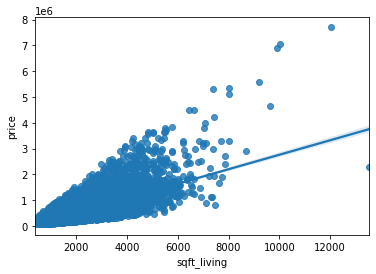

In [206]:
sns.regplot('sqft_living', 'price', data=df);

### Train- Test Split

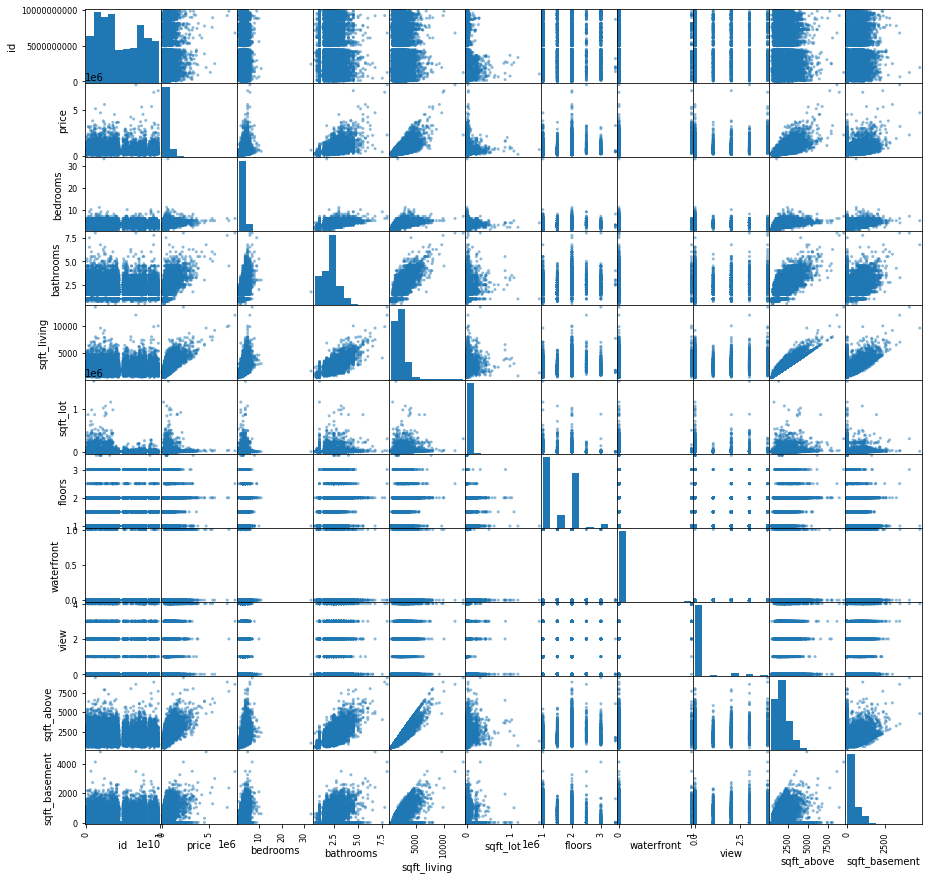

In [160]:
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()

In [214]:
cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view']


In [215]:
predictors = '+'.join(cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     4597.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:38:55   Log-Likelihood:            -2.9850e+05
No. Observations:               21597   AIC:                         5.970e+05
Df Residuals:                   21590   BIC:                         5.971e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.999e+04   7282.876      9.611      0.000    5.57e+04    8.43e+04
bedrooms    -4.668e+04   2217.015    -21.055      0.000    -5.1e+04   -4.23e+04
sqft_living   285.7877      2.488    114.876      0.000     280.911     290.664
sqft_lot       -0.3948      0.041     -9.657      0.000      -0.475      -0.315
floors       1.199e+04   3304.987      3.628      0.000    5512.721    1.85e+04
waterfront   5.879e+05   2.19e+04     26.867      0.000    5.45e+05    6.31e+05
view          7.42e+04   2445.801     30.338      0.000    6.94e+04     7.9e+04
==============================================================================
Omnibus:                    13217.425   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445191.524
Skew:                           2.402   Prob(JB):                         0.00
Kurtosis:                      24.717   Cond. No.                     5.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
X = df[cols]
y = df.price

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [189]:
lr = LinearRegression()

In [190]:
lr.fit(X_train, y_train)

LinearRegression()

In [191]:
lr.score(X_train, y_train)

0.5661556974989607

In [192]:
lr.score(X_test, y_test)

0.5457203816035582

In [121]:
df_norm = df.copy()

def z_score(c):
    return (c-c.mean())/c.std()

cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
for col in cols:
    df_norm[col] = z_score(df_norm[col])
    
    
df_norm.tail(30) 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
21567,2025049203,6/10/2014,399950.0,-1.482459,-1.451039,-1.492553,-0.336670,0.937409,0,0,-1.303031,-0.659016
21568,952006823,12/2/2014,380000.0,-0.402894,0.499586,-0.893493,-0.342876,0.937409,0,0,-1.025173,0.063874
21569,3832050760,8/28/2014,270000.0,-0.402894,0.499586,-0.229082,-0.243873,0.937409,0,0,0.098342,-0.659016
21570,2767604724,10/15/2014,505000.0,-1.482459,0.499586,-0.708330,-0.335608,2.790349,0,0,-0.433214,-0.659016
21571,6632300207,3/5/2015,385000.0,-0.402894,0.499586,-0.610302,-0.328678,2.790349,0,0,-0.324486,-0.659016
21572,2767600688,11/13/2014,414500.0,-1.482459,-0.800831,-0.947953,-0.333749,0.937409,0,0,-0.928526,-0.229800
21573,7570050450,9/10/2014,347500.0,-0.402894,0.499586,0.500681,-0.249668,0.937409,0,0,0.907755,-0.659016
21574,7430200100,5/14/2014,1220000.0,0.676671,1.800003,3.082082,-0.136562,0.010939,0,0,1.596361,3.407239
21575,4140940150,10/2/2014,572000.0,0.676671,0.824690,0.751197,-0.271594,0.937409,0,0,1.185614,-0.659016
21576,1931300412,4/16/2015,475000.0,-0.402894,0.174482,-0.969737,-0.335632,2.790349,0,0,-0.723153,-0.659016


In [100]:
cols =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']
df_encode = df_norm[cols]
df_encode = pd.get_dummies(df_encode, drop_first=True)
df_encode.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,-0.735234,-0.659016,0,0,0,1
1,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.082498,0.460766,0.244596,0,0,0,1
2,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,-1.230546,-0.659016,0,0,0,1
3,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,-0.892284,1.396702,0,0,0,1
4,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,-0.131194,-0.659016,0,0,0,1
